#Analis de datos con tips de seaborn

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# configuracion seaborn
sns.set(style="darkgrid")

In [2]:
# Carga de datos
datos = sns.load_dataset("tips")
datos.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Exploracion inicial
print(f"Dimensiones del conjunto de datos: {datos.shape}")
datos.info()
# Revision de nulos
print(datos.isnull().sum())

Dimensiones del conjunto de datos: (244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [5]:
# Limpieza
# datos = datos.dropna()

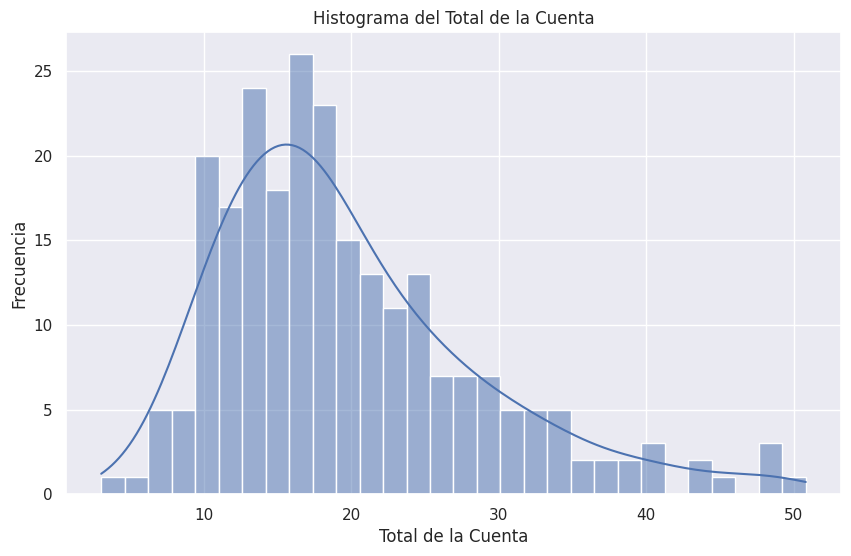

In [10]:
# Histograma del total de la cuenta
plt.figure(figsize=(10, 6))
sns.histplot(datos["total_bill"], bins=30, kde=True)
plt.title("Histograma del Total de la Cuenta")
plt.xlabel("Total de la Cuenta")
plt.ylabel("Frecuencia")
plt.show()

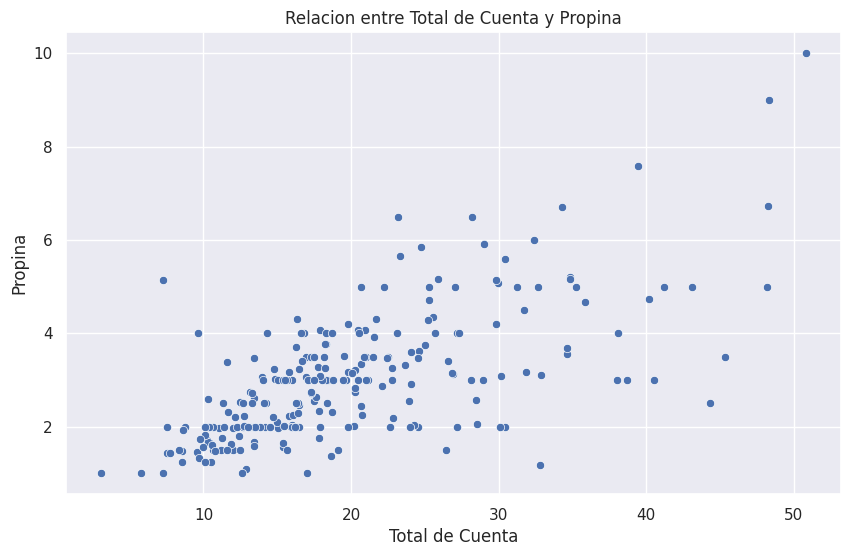

In [11]:
# Relacion entre Total de cuenta y Propina
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos, x="total_bill", y="tip")
plt.title("Relacion entre Total de Cuenta y Propina")
plt.xlabel("Total de Cuenta")
plt.ylabel("Propina")
plt.show()

In [12]:
# Preparacion para la regresion lineal
X = datos[["total_bill"]]
y = datos["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [14]:
# Evaluacion del modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadratico medio (MSE): {mse}")
print(f"Coeficiente de determinacion (R^2): {r2}")

Error cuadratico medio (MSE): 0.5688142529229536
Coeficiente de determinacion (R^2): 0.5449381659234664


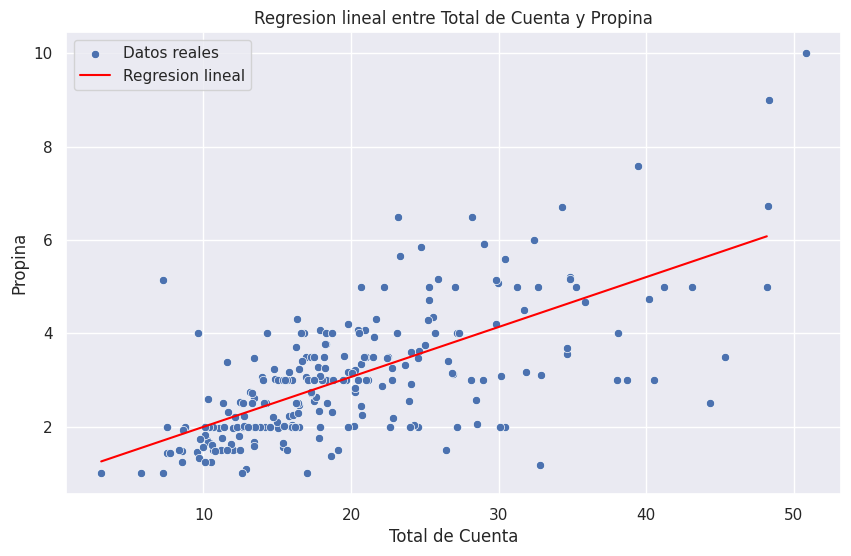

In [17]:
# Visualizacion de la regresion lineal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datos['total_bill'],y=datos['tip'],label='Datos reales')
sns.lineplot(x=X_test['total_bill'],y=y_pred,color='red',label='Regresion lineal')
plt.title("Regresion lineal entre Total de Cuenta y Propina")
plt.xlabel("Total de Cuenta")
plt.ylabel("Propina")
plt.legend()
plt.show()